### Prueba Numero PseudoAleatorios

### Nicolas Añazco

In [29]:
#Importacion de las librerias a utilizar
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [30]:

def congruencias_lin(a,b,c,m,iteraciones): 
    lista=[] 
    for i in range(iteraciones):  
        a = (a*b+c) % m
        lista.append(round(a/m,2)) 
    return lista

def getPosicion(digitos): 
    valor1 = 0 
    valor2 = 0 
    if digitos%2 !=0:
        valor1 = int(digitos/2)
        valor2 = int(digitos/2)+1
    else:
        valor1 = int(digitos/2)
        valor2 = valor1
    return valor1,valor2


def cuadradosMedios(iteraciones,v,digitos): 
    sm = int(v) 
    lista=[]  
    m = getPosicion(digitos) 
    for i in range(iteraciones): 
        n = sm**2 
        long = len(str(n)) 
        u_i = str(n)[int(long/2)-m[0]:int(long/2)+m[1]] 
        #print(u_i)
        lista.append(round(int(u_i)/10**digitos,2))   
        sm = int(u_i) 
    return lista

In [32]:

def get_list(n_gr,aum,lista): 
    var = 0
    g = []    
    ran = n_gr+1 
    num1 = 0
    num2 = 1 
    rgs = {}
    for i in range(ran): 
        g.append(round(var,2)) 
        var = var+aum   
        
    ran2 = len(g)-1
    for i in range(ran2):
        f = g[num1] 
        s = g[num2]  
        rgs.update({str(f)+","+str(s):[]}) 
        for i in lista: 
            if i!= 0: 
                if i >f and i <=s:
                    rgs[str(f)+","+str(s)].append(i) 
            else: 
                 if i >=f and i <=s:
                    rgs[str(f)+","+str(s)].append(i)
        num1=num2
        num2=num1+1  
    return rgs


def metodo_chi(lista,v):  
    n_gr = int(mt.sqrt(len(lista))) 
    aum = 1/n_gr 
    sumatoria = 0
    band = get_list(n_gr,aum,lista) 
    print(" Intervalo: ", "      Ei: ", "       Oi: ", " (Oi-Ei)^2/Ei:")
    for i, itr in enumerate(band.items()): 
        operacion = ((len(itr[1])-n_gr)**2)/n_gr 
        sumatoria+= operacion  
        txt = itr[0].split(',')
        print(i, "            ", str(n_gr)+"("+txt[0]+"-"+txt[1]+")     ", len(itr[1]),"     ", operacion)
      
    plt.figure(figsize=(8,8),facecolor='white',edgecolor='yellow')
    plt.hist(lista,color='black')
    plt.ylabel('Frecuencia') 
    plt.xlabel('Valores')
    plt.title('Histograma') 
    plt.show()    
    print("-------------------")
    print("Suma: ", sumatoria)
    if sumatoria < v: 
        return True 
    else: 
        return False

### Ejecucion del Algoritmo

Parte 1
 Intervalo:        Ei:         Oi:   (Oi-Ei)^2/Ei:
0              10(0-0.1)      11       0.1
1              10(0.1-0.2)      18       6.4
2              10(0.2-0.3)      12       0.4
3              10(0.3-0.4)      7       0.9
4              10(0.4-0.5)      13       0.9
5              10(0.5-0.6)      9       0.1
6              10(0.6-0.7)      7       0.9
7              10(0.7-0.8)      5       2.5
8              10(0.8-0.9)      8       0.4
9              10(0.9-1.0)      10       0.0


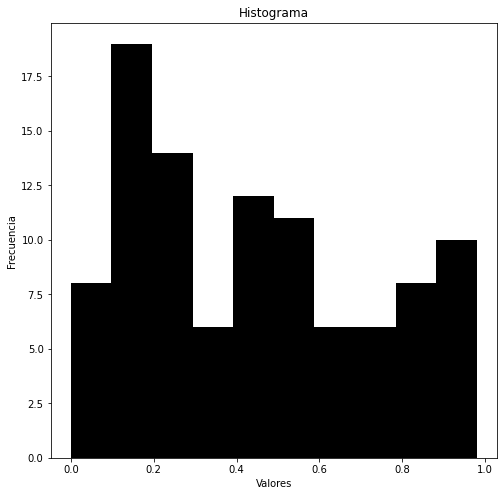

-------------------
Suma:  12.600000000000001

Parte 2
 Intervalo:        Ei:         Oi:   (Oi-Ei)^2/Ei:
0              10(0-0.1)      11       0.1
1              10(0.1-0.2)      11       0.1
2              10(0.2-0.3)      0       10.0
3              10(0.3-0.4)      22       14.4
4              10(0.4-0.5)      0       10.0
5              10(0.5-0.6)      0       10.0
6              10(0.6-0.7)      11       0.1
7              10(0.7-0.8)      11       0.1
8              10(0.8-0.9)      23       16.9
9              10(0.9-1.0)      11       0.1


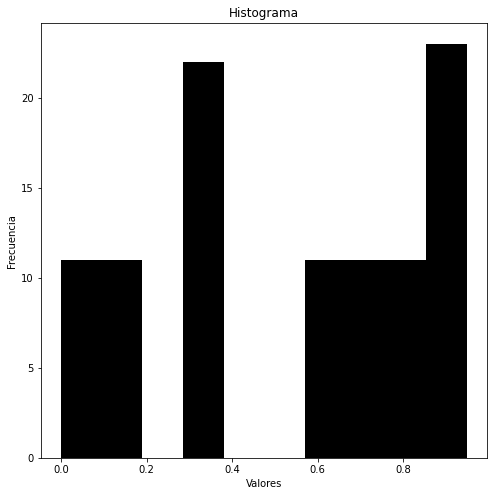

-------------------
Suma:  61.800000000000004


In [33]:

if __name__ == "__main__":
    iteraciones = 100
    v_obtenido= 16.9 
    D = 7  
    Xo = 74731897457  
    b = 37747318974  
    M = 19  
    
    print("Parte 1")
    lista = cuadradosMedios(iteraciones, Xo, 7)
    res=metodo_chi(lista,v_obtenido)
    print("")
    print("Parte 2")
    lista2 = congruencias_lin(D,Xo,b,M,iteraciones)
    res2 = metodo_chi(lista2,v_obtenido)